### Name Soheil Homayoonfard
### StudentId 98100561


# Librarires

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans as SKLearnKMeans


# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [6]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        random_indices = np.random.permutation(X.shape[0])
        self.centroids = X[random_indices[:self.n_clusters]]

        for _ in range(self.max_iter):
            self.labels = self._assign_labels(X)
            new_centroids = self._calculate_centroids(X)

            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

    def _assign_labels(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _calculate_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k] = X[self.labels == k].mean(axis=0)
        return centroids

    def predict(self, X):
        return self._assign_labels(X)

    def inertia(self, X):
        distances = np.sqrt(((X - self.centroids[self.labels])**2).sum(axis=1))
        return np.sum(distances**2)

# Use elbow method and silhouette method to choose optimal cluster numbers

In [4]:
def elbow_method(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertias.append(kmeans.inertia(X))

    # Compute the second derivative of the inertias
    second_derivative = np.diff(inertias, 2)
    optimal_k = np.argmax(second_derivative) + 2  # +2 to correct the index offset

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.axvline(x=optimal_k, color='r', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for Optimal k (Optimal k = {optimal_k})')
    plt.show()

def silhouette_method(X, max_k):
    silhouette_avgs = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        silhouette_avgs.append(silhouette_score(X, kmeans.labels))

    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k+1), silhouette_avgs, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal k')
    plt.show()

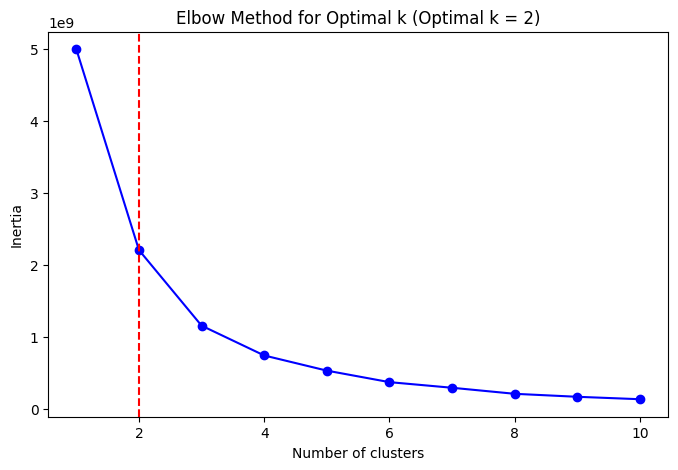

In [10]:
elbow_method(x_data, 10)

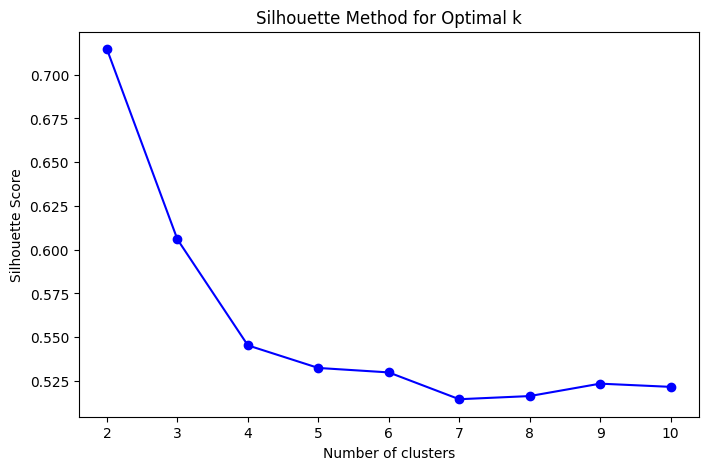

In [11]:
silhouette_method(x_data, 10)

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

In [12]:
def elbow_method_sklearn(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = SKLearnKMeans(n_clusters=k)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Compute the second derivative of the inertias
    second_derivative = np.diff(inertias, 2)
    optimal_k = np.argmax(second_derivative) + 2  # +2 to correct the index offset

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.axvline(x=optimal_k, color='r', linestyle='--')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for Optimal k (Optimal k = {optimal_k})')
    plt.show()

def silhouette_method_sklearn(X, max_k):
    silhouette_avgs = []
    for k in range(2, max_k + 1):
        kmeans = SKLearnKMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        silhouette_avgs.append(silhouette_score(X, kmeans.labels_))

    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k + 1), silhouette_avgs, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal k (sklearn)')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

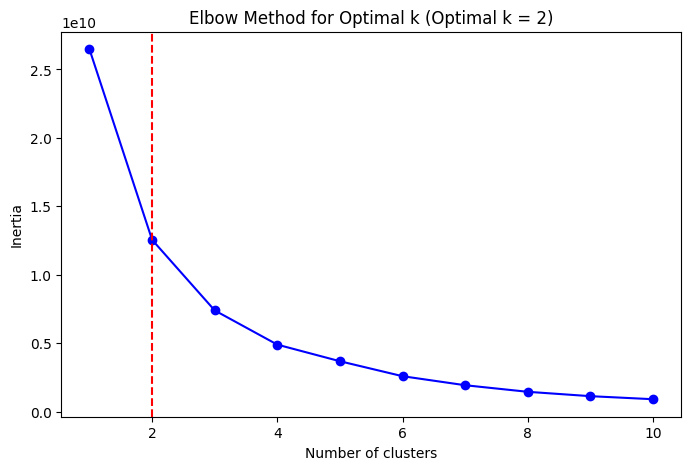

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

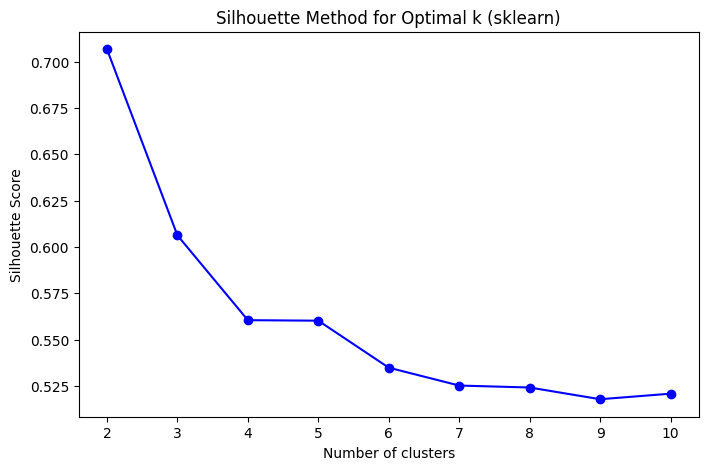

In [13]:
elbow_method_sklearn(X, max_k=10)
silhouette_method_sklearn(X, max_k=10)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

As we can see the answer is the same for all 4 of the runs and it's 2.


### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method